In [3]:
import pandas as pd
df=pd.read_csv("D:\AI course\datasets\spam.csv", encoding="latin1")

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\AR COMPUTER\AppData\Local\Temp\ipykernel_7580\1366780115.py:2: SyntaxWarning: invalid escape sequence '\A'
  df=pd.read_csv("D:\AI course\datasets\spam.csv", encoding="latin1")


## data cleaning

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],  inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
dict1= {"v1": "label", "v2": "message"}

In [13]:
df.rename(columns=dict1, inplace=True)

In [14]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
dict2={ "ham": 0, "spam":1}

In [18]:
df["label"]=df["label"].replace(dict2)

C:\Users\AR COMPUTER\AppData\Local\Temp\ipykernel_7580\427758282.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"]=df["label"].replace(dict2)


In [19]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [23]:
df.duplicated().sum()

403

In [25]:
df=df.drop_duplicates()

## insights from data

In [26]:
df["label"].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [27]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x178361c95e0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'not spam'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

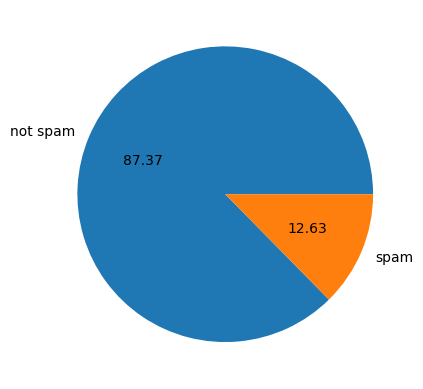

In [32]:
plt.pie(df["label"].value_counts(), labels=["not spam", "spam"], autopct="%0.2f")

In [33]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [36]:
df["word_tokens"]=df["message"].apply(lambda x: len(word_tokenize(x)))

In [37]:
df.head()

,label,message,word_tokens
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [38]:
df["sent_tokens"]= df["message"].apply(lambda x: len(sent_tokenize(x)))

In [39]:
df.head()

,label,message,word_tokens,sent_tokens
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1


In [41]:
df.describe()

,label,word_tokens,sent_tokens
count,5169.000000,5169.000000,5169.000000
mean,0.126330,18.455794,1.965564
std,0.332253,13.324758,1.448541
min,0.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000
50%,0.000000,15.000000,1.000000
75%,0.000000,26.000000,2.000000
max,1.000000,220.000000,38.000000


In [43]:
df[df["label"]==0].describe()

,label,word_tokens,sent_tokens
count,4516.0,4516.000000,4516.000000
mean,0.0,17.123782,1.820195
std,0.0,13.493970,1.383657
min,0.0,1.000000,1.000000
25%,0.0,8.000000,1.000000
50%,0.0,13.000000,1.000000
75%,0.0,22.000000,2.000000
max,0.0,220.000000,38.000000


In [44]:
df[df["label"]==1].describe()

,label,word_tokens,sent_tokens
count,653.0,653.000000,653.000000
mean,1.0,27.667688,2.970904
std,0.0,7.008418,1.488425
min,1.0,2.000000,1.000000
25%,1.0,25.000000,2.000000
50%,1.0,29.000000,3.000000
75%,1.0,32.000000,4.000000
max,1.0,46.000000,9.000000


## preprocessing text

In [45]:
import nltk
from nltk.corpus import stopwords
words=stopwords.words("english")

In [65]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

In [47]:
def transform_text(text):
    text=text.lower()
    text=word_tokenize(text)
    return text



In [49]:
transform_text("Capital , AHMED")

['capital', ',', 'ahmed']

In [50]:
def transform_text(text):
    text=text.lower()
    text=word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y
            
    



In [53]:
transform_text("Capital , AHMED !!8!")

['capital', 'ahmed', '8']

In [54]:
def transform_text(text):
    text=text.lower()
    text=word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:] #saving contents of y in text variable
    y.clear() #y is empty now
    for i in text:
        y.append(ps.stem(i))

    return y
            
    



In [56]:
transform_text("Capital,, swimming connection connected 789")

['capit', 'swim', 'connect', 'connect', '789']

In [66]:
def transform_text(text):
    text=text.lower()
    text=word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:] #saving contents of y in text variable
    y.clear() #y is empty now
    for i in text:
        y.append(lem.lemmatize(i))
    text=y[:]
    y.clear()
    for i in text:
        if i not in words:
            y.append(i)
    return " ".join(y)

            
    



In [67]:
transform_text("I have done my HW, How are you?")

'done hw'

In [68]:
df["transformed"]=df["message"].apply(transform_text)

In [73]:
df.head()

,label,message,word_tokens,sent_tokens,transformed
0,0,"Go until jurong point, crazy.. Available only ...",24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,nah think go usf life around though


In [71]:
!pip install wordcloud
from wordcloud import WordCloud

In [72]:
wc=WordCloud(width=600, height=600, background_color="white", min_font_size=12, max_words=100)

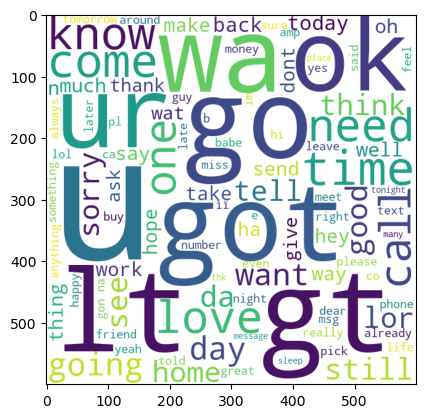

In [74]:
not_spam=wc.generate(df[df["label"]==0]["transformed"].str.cat(sep=" "))
plt.imshow(not_spam)

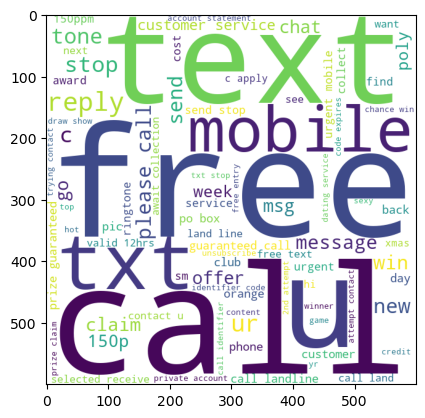

In [75]:
spam=wc.generate(df[df["label"]==1]["transformed"].str.cat(sep=" "))
plt.imshow(spam)

## specifying features and lables

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
cv=CountVectorizer()

In [80]:
X=cv.fit_transform(df["transformed"])

In [91]:
X=X.toarray()

In [83]:
X.toarray().shape

(5169, 7482)

In [85]:
cv.get_feature_names_out()

array(['008704050406', '0089', '0121', ..., 'åôrents', 'ìä', 'ìï'],
      dtype=object)

In [86]:
y=df["label"]

## model training

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, 

In [92]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.4)

## guassian Naive bais

In [93]:
gnb=GaussianNB()

In [94]:
gnb.fit(X_train, y_train)

GaussianNB()

In [95]:
gnb.score(X_test,y_test)

0.8892649903288201

In [109]:
model_pred=gnb.predict(X_test)

In [97]:
y_test #actual prediction

4519    0
1414    0
1324    0
2135    0
4184    0
       ..
3611    0
4506    0
806     0
4662    0
2934    0
Name: label, Length: 2068, dtype: int64

In [98]:
accuracy_score(model_pred, y_test)

0.8892649903288201

In [110]:
confusion_matrix(model_pred, y_test)

array([[1586,   28],
       [ 201,  253]], dtype=int64)

In [111]:
precision_score(model_pred, y_test)

0.900355871886121

## multinomia NB

In [100]:
mnb=MultinomialNB()

In [101]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [102]:
mnb.score(X_test, y_test)

0.9709864603481625

## Bernoulli NB

In [103]:
bnb= BernoulliNB()

In [104]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [105]:
bnb.score(X_test, y_test)

0.9632495164410058

In [106]:
model_pred=bnb.predict(X_test)

In [107]:
confusion_matrix(model_pred, y_test)

array([[1784,   73],
       [   3,  208]], dtype=int64)

In [108]:
precision_score(model_pred, y_test)

0.7402135231316725

## check spam or not spma on user input

In [115]:
text= input("Enter the text you want to check")
text=transform_text(text)

text=cv.transform([text]).toarray()

gnb.predict(text)

Enter the text you want to check  FLASH SALE! 🚨 🔥 EVERYTHING MUST GO! 🔥 💥 BUY 1, GET 2 FREE – TODAY ONLY! 💥 🛒 LIMITED STOCK – Click FAST 👉 www.buycrazydeals.com 📦 FREE SHIPPING + FREE GIFT with EVERY order! 💸 Don’t miss out – this offer DISAPPEARS at MIDNIGHT!  💬 REPLY “YES” to GRAB your DEAL NOW! 📲


array([0], dtype=int64)